## Linear Models

Linear models are a class of models that are widely used in practice and have been studied extensively in the last few decades, with roots going back over a hundred years.  Linear models make a prediction using a *linear function* of the input features.

### Linear Models For Regression

For regression, the general prediction formula for a linear model looks like:

    ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Here, 
  - x[0] to x[p] denotes the features of a single data point
      (there are p+1 features in this example)
  - w and b are parameters of the model that are learned
  - ŷ is the prediction the model makes
  
For a dataset with a single feature, this is:
    
    ŷ = w[0] * x[0] + b

This is really just the basic line, with w[0] as the slope and b as the y-intercept.  For more features, w contains the slope along each feature axis.  

Alternatively, you can think of the predicted response as being a weighted sum of the input features, with weights (which can be negative) given by the entries of w.

In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

w[0]: 0.393906  b: -0.031804


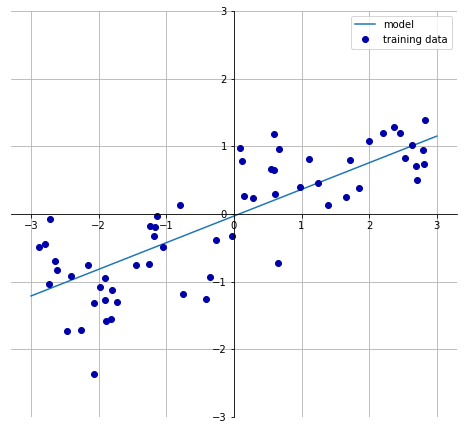

In [3]:
# Trying to learn the parameters w[0] and b on our one-dimensional 
#   wave dataset might lead to the following line
mglearn.plots.plot_linear_regression_wave()

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using 2 features, or a hyperplane in higher dimensions.

If we compare the predictions made by the straight line with those made by the *KNeighborsRegressor*, using a straight line to make predictions seems very restrictive.  It looks like all the fine details are lost.  In a sense, this is true!

It is a strong (and somewhat unrealistic) assumption that our target y is a linear combination of the features.  But, looking at 1D data gives a somewhat skewed perspective.  For datasets with many features, linear models can be very powerful.  In particular, if you have more features than training data points, any target y can be perfectly modeled as a linear function.

There are many different linear models for regression.  The difference between these models lie in how *w* and _b_ are learned from the training data, and how model complexity can be controlled.

### Linear Regression (aka Ordinary Least Squares)

*Linear regression*, or *Ordinary Least Squares (OLS)*, is the simplest and most classic linear method for regression.  Linear regression finds the parameters *w* and _b_ that minimize the *mean squared error (MSE)* between between predictions and true regression targets (*y*) on the training set.

The *MSE* is the sum of the squared differences between the predictions and true values, divided by the number of samples.  Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.

In [4]:
# This is the code that produces the graph above

# Construct and split the data set
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

The slope parameters (w), also called *weights* or _coefficients_, are stored in the *coef_* attribute, while the intercept (b) or *offset* is stored in the *intercept_* attribute.

In [5]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


#### Note

scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore (like *coef_* or *intercept_*). That is to separate them from parameters that are set by the user.

The *intercept_* attribute is always a single float number, while the *coef_* attribute is a NumPy array with one entry per input feature.

In [6]:
# Now, we'll look at the training and test set performance
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An R² of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together.  This means we are very likely underfitting.  

For a 1D dataset, there is little danger of overfitting, as the model is very simple.  However, with higher-dimensional datasets, linear models became more powerful, and there is a higher chance of overfitting.

Let's take a look at how *LinearRegression* performs on a more complex dataset, like the Boston Housing dataset.  This dataset has 506 samples and 104 derived features.

In [7]:
# Load the extended Boston housing dataset
X, y = mglearn.datasets.load_extended_boston()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit the model
lr = LinearRegression().fit(X_train, y_train)

In [9]:
# Score the model for the training and test sets
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [10]:
# Here are the coefficients and intercept
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+0

This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity.

### Ridge Regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for OLS.  

In ridge regression, though, the coefficients (*w*) are chosen not only so that they predict well on the training data, but also to fit an additional constraint.  We also want the magnitude of coefficients to be as small as possible.  In other words, all entries of *w* should be close to zero.

Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well.  This contraint is an example of what is called *regularization*.  

*Regularization* means explicity restricting a model to avoid overfitting.    The particular kind of regularization used by ridge regression is called *L2 regularization*.

In [11]:
# Ridge regression is implemented in linear_model.Ridge
from sklearn.linear_model import Ridge

# Here, we fit the model for the extended Boston housing dataset
ridge = Ridge().fit(X_train, y_train)

# Score the model for the training and test sets
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75
